In [1]:
import numpy as np
import pandas as pd
import harmonica as hm
import matplotlib.pyplot as plt
import verde as vd
import pygmt

# Setting up Data

In [2]:
equivalent_sources = hm.EquivalentSources(damping=1,block_size=5000)
equivalent_sources

,damping,1
,points,None
,depth,'default'
,block_size,5000
,parallel,True
,dtype,'float64'


In [3]:
CCC = pd.read_csv('pointmaps/Ice_Bridge.csv')

# Equivalent sources Interpolation with complete Data

In [4]:
Coordinates = np.array(CCC[['easting', 'northing', 'height']]).T
Gravity_anomaly = np.array(CCC['free_air_gravity_70s'])

In [5]:
n = 2 #every n. point is used
coordinates = Coordinates[:,::n]
gravity_anomaly = Gravity_anomaly[::n]

print(coordinates.shape,gravity_anomaly.shape)

(3, 143411) (143411,)


Text(0, 0.5, 'Northing')

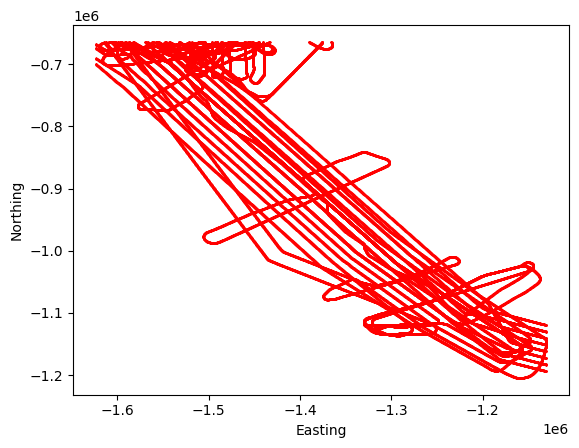

In [6]:
#plt.scatter(Coordinates[0], Coordinates[1], s = 0.2)
plt.scatter(coordinates[0], coordinates[1], s = 0.2, c = 'r')
plt.xlabel('Easting')
plt.ylabel('Northing')

In [7]:
coordinates[1].shape

(143411,)

In [8]:
# min,max values for region
easting_min, easting_max = CCC['easting'].min(), CCC['easting'].max()
northing_min, northing_max = CCC['northing'].min(), CCC['northing'].max()

# Define the region and grid spacing
region = [easting_min, easting_max, northing_min, northing_max]
shape = (100, 100)  # e.g., (100, 100)
grid_coordinates = vd.grid_coordinates(region, shape=shape, extra_coords=-CCC['height'].mean())

In [9]:
# Fit the model
equivalent_sources.fit(coordinates, gravity_anomaly)

,damping,1
,points,None
,depth,'default'
,block_size,5000
,parallel,True
,dtype,'float64'


In [10]:
print(CCC['easting'].min(),coordinates[0].min())

-1623990.97 -1623990.97


In [11]:
# Predict interpolated gravity
interpolated_gravity = equivalent_sources.predict(grid_coordinates)

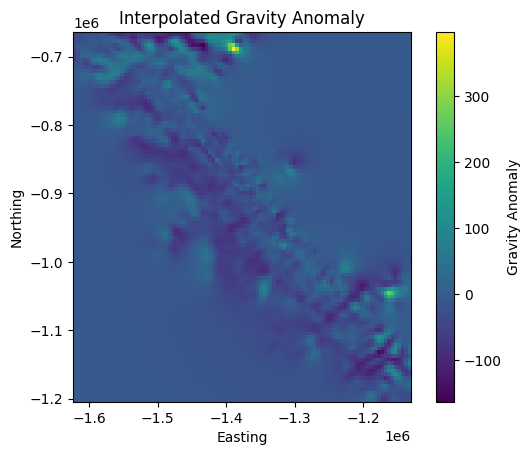

In [12]:
plt.imshow(interpolated_gravity.reshape(shape), extent=region, origin='lower')
plt.colorbar(label='Gravity Anomaly')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Interpolated Gravity Anomaly')
plt.show()

In [13]:
# Build the grid coordinates
grid_coords = vd.grid_coordinates(region=region, spacing=2e3, extra_coords=2.2e3)

# Grid the gravity disturbances
grid = equivalent_sources.grid(grid_coords, data_names=["gravity_disturbance"])
grid

<xarray.Dataset> Size: 1MB
Dimensions:              (northing: 271, easting: 248)
Coordinates:
  * northing             (northing) float64 2kB -1.205e+06 ... -6.64e+05
  * easting              (easting) float64 2kB -1.624e+06 ... -1.13e+06
    upward               (northing, easting) float64 538kB 2.2e+03 ... 2.2e+03
Data variables:
    gravity_disturbance  (northing, easting) float64 538kB -6.723 ... -4.449
Attributes:
    metadata:  Generated by EquivalentSources(block_size=5000, damping=1)

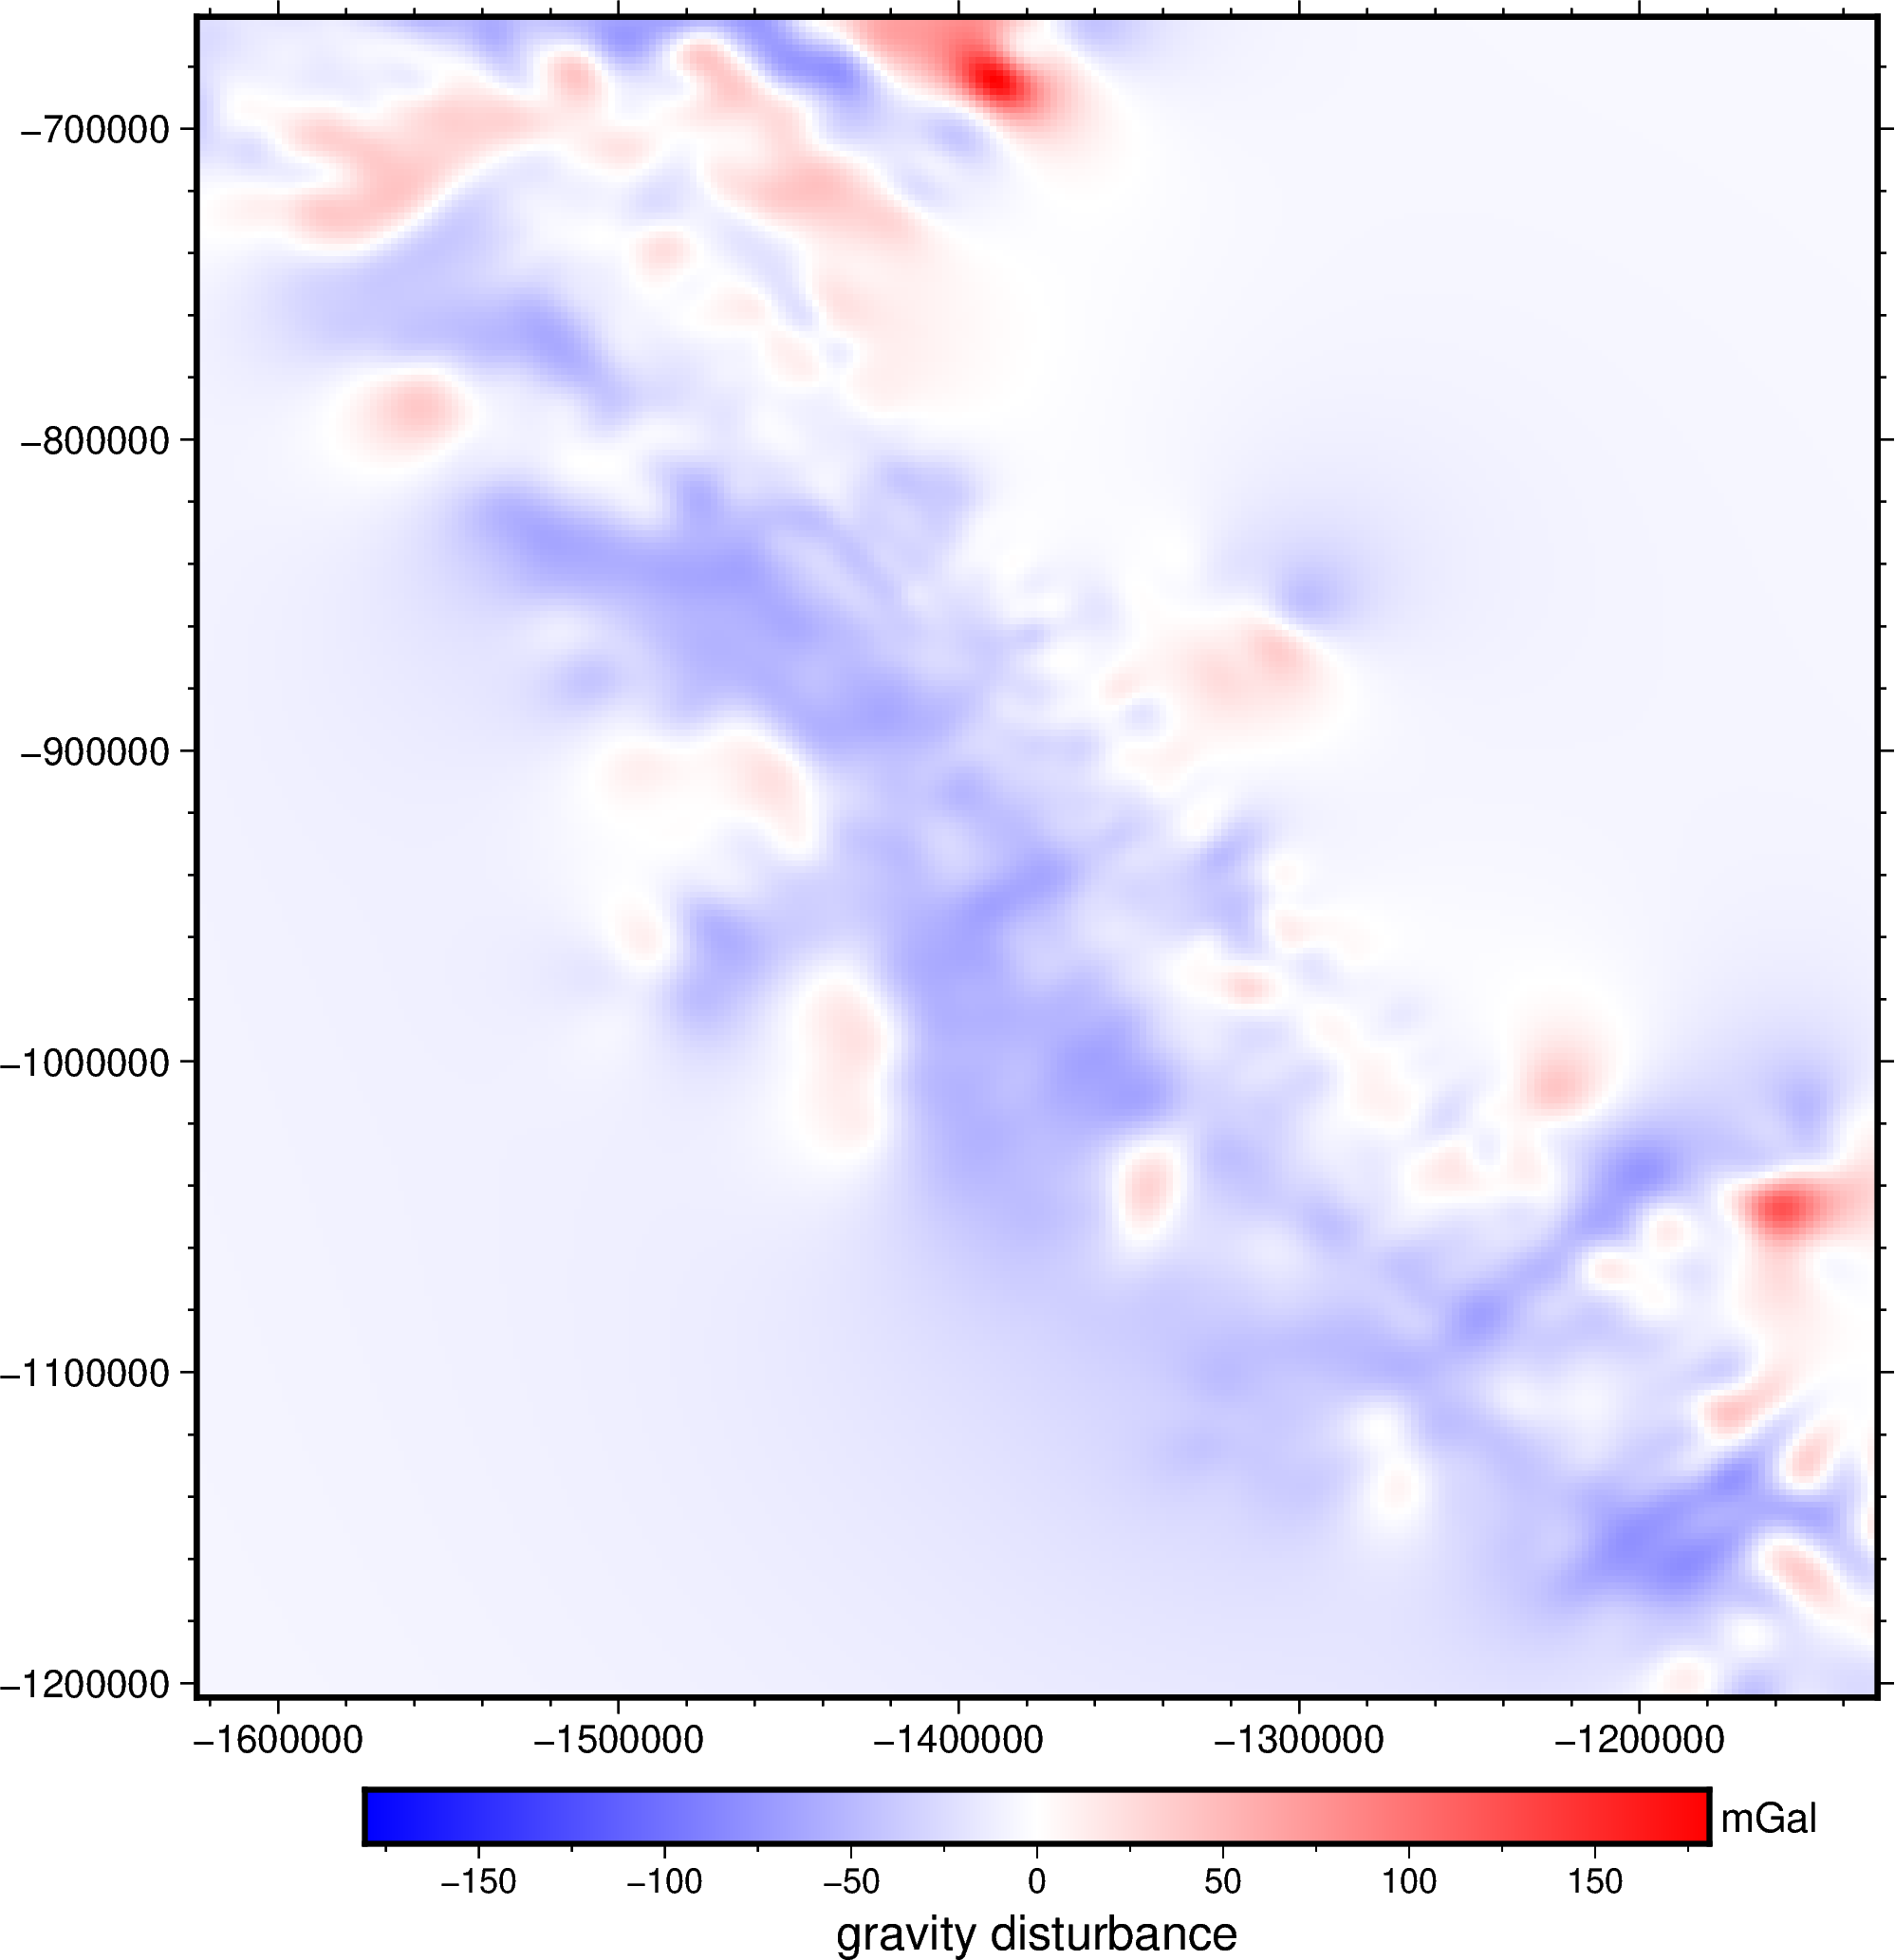

In [14]:
maxabs = vd.maxabs(grid.gravity_disturbance)

fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h0", series=[-maxabs, maxabs])
fig.grdimage(
   frame=['af', 'WSen'],
   grid=grid.gravity_disturbance,
   region=region,
   #projection=fig_proj,
   cmap=True,
)
fig.colorbar(cmap=True, frame=["a50f25", "x+lgravity disturbance", "y+lmGal"])

fig.show()